# Я художник, я так вижу, визуализация данных в питоне

# I. Numpy

### Импортируйте NumPy

In [7]:
import numpy as np

### Создайте одномерный массив размера 10, заполненный нулями и пятым элемент равным 1. 
### Трансформируйте в двумерный массив.

In [14]:
a = np.zeros(10)
a[4] = 1
print(a)
print(a.reshape(2, 5))


[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]]


array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

### Создайте одномерный массив со значениями от 10 до 49 и разверните его (первый элемент становится последним). Найдите в нем все четные элементы.

In [23]:
a = np.arange(10, 49)
print(np.flip(a[a % 2 == 0]))

[48 46 44 42 40 38 36 34 32 30 28 26 24 22 20 18 16 14 12 10]


### Создайте двумерный массив 3x3 со значениями от 0 до 8

In [27]:
a = np.arange(0, 9)
print(a.reshape(3, 3))

[[0 1 2]
 [3 4 5]
 [6 7 8]]


### Создайте массив 4x3x2 со случайными значениями. Найти его минимум и максимум.

In [14]:
a3d = np.random.randint(0, 10, (4, 3, 2))
print('min', a3d.min())
print('max', a3d.max())

min 0
max 9


### Создайте два двумерных массива размерами 6x4 и 4x3 и произведите их матричное умножение. 

In [17]:
a = np.random.randint(0, 10, (6, 4))
b = np.random.randint(0, 10, (4, 3))
print(a @ b)

[[ 90 102 129]
 [ 48  45  75]
 [ 98 112 122]
 [ 96 105 120]
 [106  49  96]
 [121 119 148]]


### Создайте случайный двумерный массив 7x7, найти у него среднее и стандартное оклонение. Нормализуйте этот массив.

In [22]:
a = np.random.randint(0, 10, (7, 7))
mean_value = np.mean(a)
std_value = np.std(a)
normalized = (a - mean_value) / std_value
print(np.std(normalized), np.mean(normalized))

0.9999999999999998 -3.172065784643304e-17


# II. Pandas

### Импортируйте: pandas, matplotlib, seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Загрузите датасет Tips из набора датасетов seaborn

In [2]:
tips = sns.load_dataset('tips')

### Посмотрите на первые 5 строчек

In [10]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Узнайте сколько всего строчек и колонок в данных

In [67]:
tips.shape

(244, 7)

### Проверьте есть ли пропуски в данных

In [68]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### Посмотрите на распределение числовых признаков

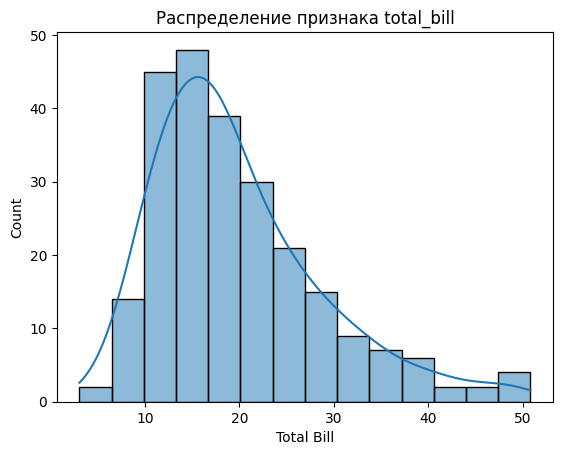

In [9]:
sns.histplot(tips['total_bill'], kde=True)
plt.xlabel('Total Bill')
plt.title('Распределение признака total_bill')
plt.show()

### Найдите максимальное значение 'total_bill'

In [12]:
a = max(tips['total_bill'])
b = tips['total_bill'].max()
print(a, b, sep="\n")

50.81
50.81


### Найдите количество курящих людей

In [20]:
# d = {"No" : False,"Yes" :True}
# tips['smoker'] = tips['smoker'].map(d)
yes = tips[tips['smoker'] == 'Yes']['smoker'].shape[0]
print(yes)

93


### Узнайте какой средний 'total_bill' в зависимости от 'day'

In [24]:
average_per_day_name = tips.groupby('day', observed=True)['total_bill'].mean()
print(average_per_day_name)

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64


 ### Отберите строчки с 'total_bill' больше медианы и узнайте какой средний 'tip' в зависимости от 'sex'

In [15]:
median = tips['total_bill'].median()
big_median = tips[tips['total_bill'] > median]
male_female_median = big_median.groupby('sex', observed=True)['tip'].mean()
print(male_female_median)

sex
Male      3.756404
Female    3.663939
Name: tip, dtype: float64


### Преобразуйте признак 'smoker' в бинарный (0-No, 1-Yes)

In [16]:
d = { 'No' : 0, 'Yes' : 1}
tips['smoker'] = tips['smoker'].map(d)
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female      0   Sun  Dinner     2
1         10.34  1.66    Male      0   Sun  Dinner     3
2         21.01  3.50    Male      0   Sun  Dinner     3
3         23.68  3.31    Male      0   Sun  Dinner     2
4         24.59  3.61  Female      0   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male      0   Sat  Dinner     3
240       27.18  2.00  Female      1   Sat  Dinner     2
241       22.67  2.00    Male      1   Sat  Dinner     2
242       17.82  1.75    Male      0   Sat  Dinner     2
243       18.78  3.00  Female      0  Thur  Dinner     2

[244 rows x 7 columns]


# III. Visualization

### Постройте гистограмму распределения признака 'total_bill'

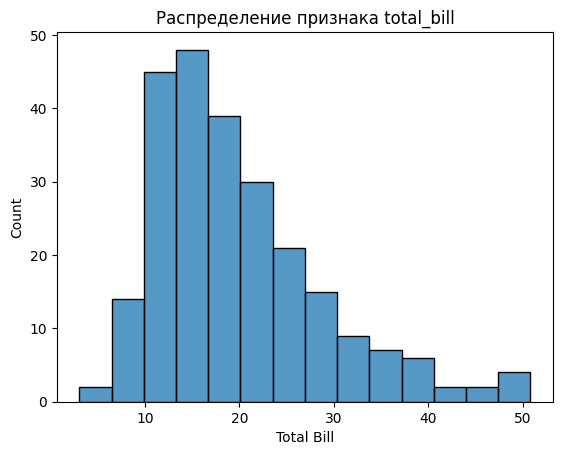

In [24]:
sns.histplot(tips['total_bill'])
plt.xlabel('Total Bill')
plt.title('Распределение признака total_bill')
plt.show()

### Постройте scatterplot, представляющий взаимосвязь между признаками 'total_bill' и 'tip'

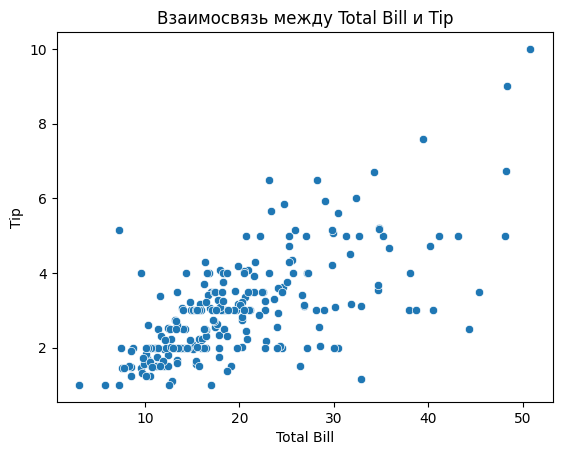

In [29]:
sns.scatterplot(data=tips, x='total_bill', y='tip')

plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Взаимосвязь между Total Bill и Tip')

plt.show()

### Постройте pairplot

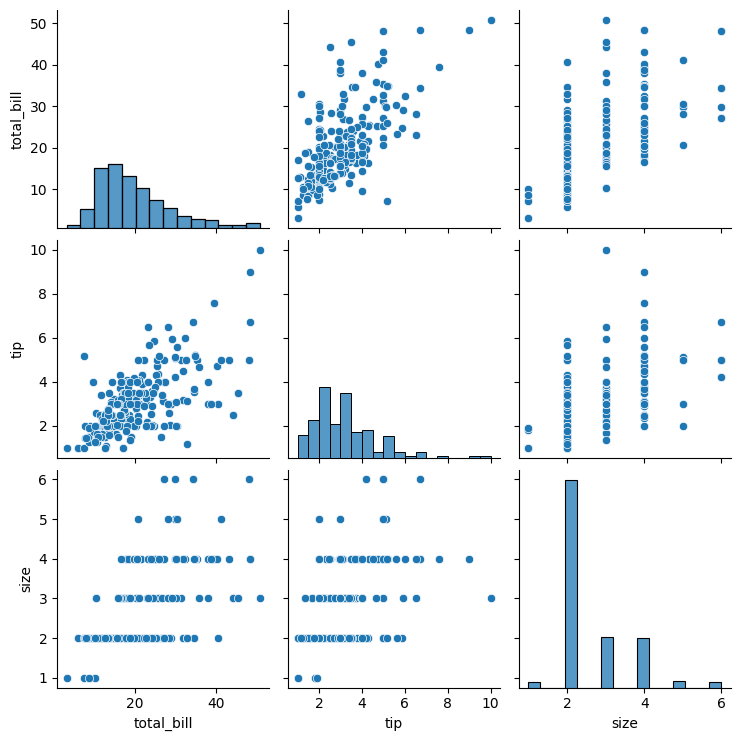

In [30]:
sns.pairplot(tips)
plt.show()

### Постройте график взаимосвязи между признаками 'total_bill' и 'day'

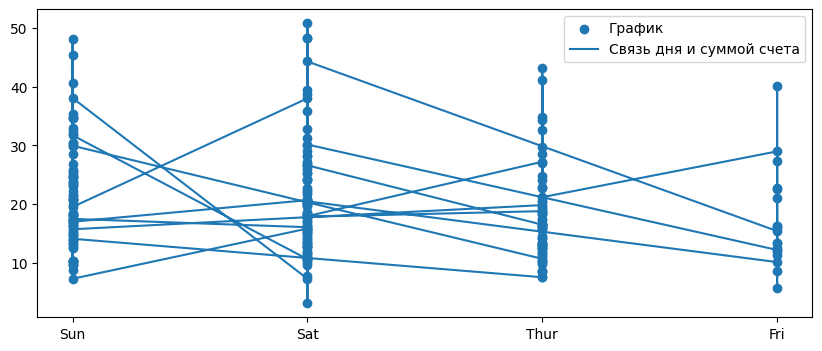

In [ ]:
total_bill = tips["total_bill"]
day = tips["day"]

fig, axes = plt.subplots(1, 1, figsize=(10, 4))
axes.scatter(day, total_bill, label="График")
axes.plot(day, total_bill, label="Связь дня и суммой счета")
plt.legend(loc=0)

# plt.show()

### Постройте две гистограммы распределения признака 'tip' в зависимости от категорий 'time'

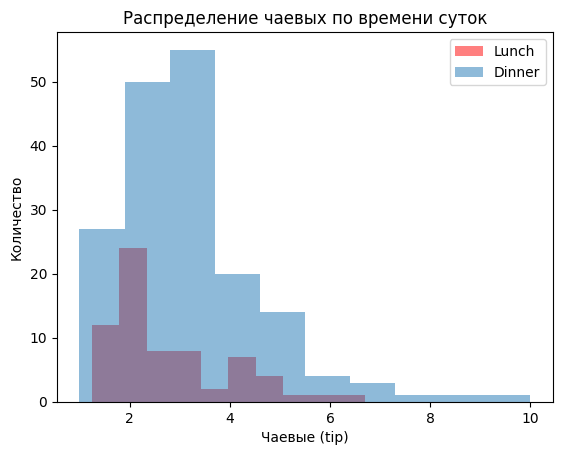

In [35]:
# Отделяем данные для каждого типа времени
tips_lunch = tips[tips['time'] == 'Lunch']['tip']
tips_dinner = tips[tips['time'] == 'Dinner']['tip']

# Построение двух гистограмм
plt.hist(tips_lunch, bins=10, alpha=0.5, label='Lunch', color='red')
plt.hist(tips_dinner, bins=10, alpha=0.5, label='Dinner')

# Добавляем легенду, подписи и заголовок
plt.xlabel('Чаевые (tip)')
plt.ylabel('Количество')
plt.title('Распределение чаевых по времени суток')
plt.legend()

plt.show()

### Постройте два графика scatterplot, представляющих взаимосвязь между признаками 'total_bill' и 'tip' один для Male, другой для Female и раскрасьте точки в зависимоти от признака 'smoker'

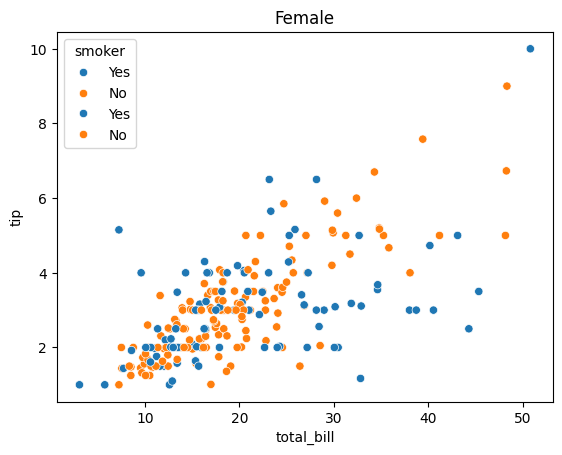

In [9]:
male = tips[tips['sex'] == 'Male']
female = tips[tips['sex'] == 'Female']

sns.scatterplot(data=male, x='total_bill', y='tip', hue='smoker')
plt.title('Male')
plt.show()
sns.scatterplot(data=female, x='total_bill', y='tip', hue='smoker')
plt.title('Female')
plt.show()

## Сделайте выводы по анализу датасета и построенным графикам. По желанию можете продолжить анализ данных и также отразить это в выводах.

In [ ]:
# ВАШ КОД ЗДЕСЬ